In [27]:
import pandas as pd
import seaborn as sns

In [7]:
#read in our data and clean up the dataset

data = pd.read_csv(
    "cpat_output.ORF_prob.tsv",
    sep = r"\s+",
    index_col = "ID",
)

In [9]:
#read in the reference human data and clean up the dataset

dathuman = pd.read_csv(
    "Human_train.dat",
    sep = r"\s+",
    index_col = "ID",
)

In [11]:
# To plot probability, mRNA length, and ORF length on the same graph, we need to convert mRNA and ORF data into the form of [0;1].
# To do that, I'm finding the max value for each and then creating a new column where each individual value is divided by the max value.

# Find out max value for mRNA length

data["mRNA"].max()

13076

In [13]:
# Find out max value for OFR length

data["ORF"].max()

9294

In [15]:
# Create a new column with updated mRNA length % from maximal value

data["mRNA_percent"] = data["mRNA"]/13076

In [17]:
# Create a new column with updated ORF length % from maximal value

data["ORF_percent"] = data["mRNA"]/9294

In [19]:
# Check that new columns are there

data.head()

,mRNA,ORF_strand,ORF_frame,ORF_start,ORF_end,ORF,Fickett,Hexamer,Prob,mRNA_percent,ORF_percent
ID,,,,,,,,,,,
ALL_BATCH_14.11.1_ORF_1,12820,-,2,4716,3874,843,0.7604,0.451990,2.220446e-16,0.980422,1.379385
ALL_BATCH_14.11.1_ORF_2,12820,-,1,5695,5120,576,0.7038,0.316782,2.220446e-16,0.980422,1.379385
ALL_BATCH_14.11.1_ORF_3,12820,-,1,12559,12011,549,0.8198,0.220980,2.220446e-16,0.980422,1.379385
ALL_BATCH_14.11.1_ORF_4,12820,-,3,2750,2232,519,0.9839,0.504164,2.220446e-16,0.980422,1.379385
ALL_BATCH_14.11.1_ORF_5,12820,-,3,11165,10821,345,1.0940,0.477512,2.220446e-16,0.980422,1.379385


In [ ]:
# Check data distribution with histograms, Q-Q plots and Shapiro-Wilk test

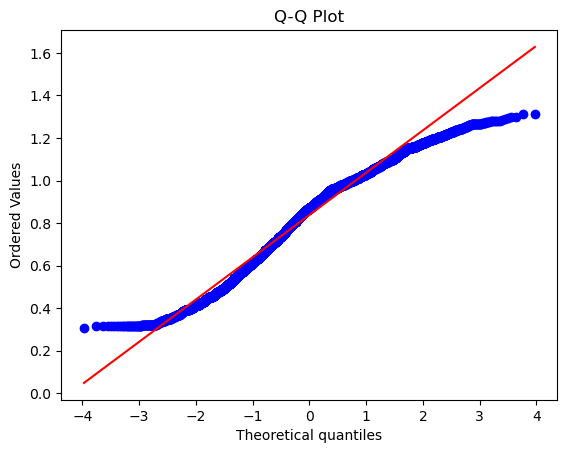

In [21]:
# Q-Q plot

import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate Q-Q plot
stats.probplot(data["Fickett"], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Replace "Ficket" with other variable names to check other variables

In [23]:
# Shapiro-Wilk test

from scipy.stats import shapiro

stat, p = shapiro(data["Fickett"])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data does not appear to be normally distributed (reject H0).")

# Replace "Ficket" with other variable names to check other variables

Shapiro-Wilk Test Statistic: 0.9759171342807814, p-value: 2.864747053362037e-48
Data does not appear to be normally distributed (reject H0).


C:\Users\shakirovaa\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19391.
  res = hypotest_fun_out(*samples, **kwds)


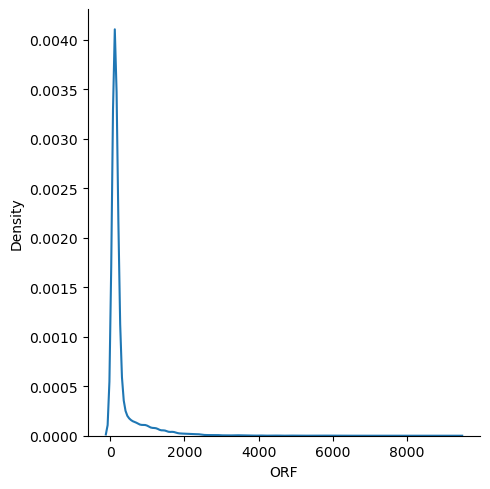

In [29]:
# Distribution plots
# Can be done with smooth line (kind="kde") or with bars (then get rid of kind="kde" line)

sns.displot(
    data = data,
    x = "ORF",
    kind = "kde",
)

# Replace "ORF" with other variable names to check other variables

# To save the image, add this line at the end of the box:
# plt.savefig("NAME.png",dpi=300, bbox_inches='tight')

(0.0, 1.0)

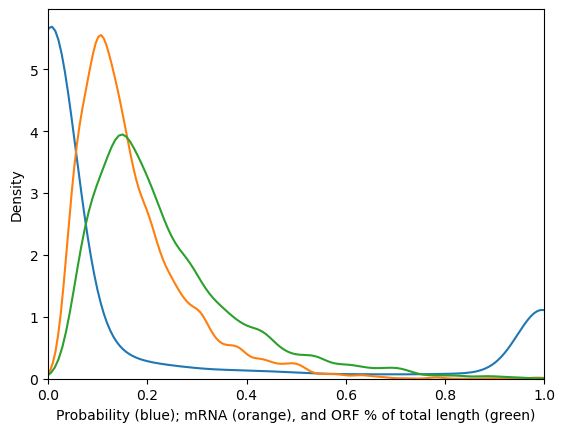

In [31]:
# Plotting probability, mRNA length, and ORF length together

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
sns.kdeplot(
    data = data,
    x = "Prob",
    common_norm=False,
    ax=ax,
).set(
    xlabel = "Probability (blue); mRNA (orange), and ORF % of total length (green)"
)
sns.kdeplot(
    data = data,
    x = "mRNA_percent",
    common_norm=False,
    ax=ax,
)
sns.kdeplot(
    data = data,
    x = "ORF_percent",
    common_norm=False,
    ax=ax,
)
plt.xlim(0,1)

## Model

In [ ]:
# Check variable names from both datasets for the model

In [219]:
data.head()

,mRNA,ORF_strand,ORF_frame,ORF_start,ORF_end,ORF,Fickett,Hexamer,Prob,mRNA_percent
ID,,,,,,,,,,
ALL_BATCH_14.11.1_ORF_1,12820,-,2,4716,3874,843,0.7604,0.451990,2.220446e-16,0.980422
ALL_BATCH_14.11.1_ORF_2,12820,-,1,5695,5120,576,0.7038,0.316782,2.220446e-16,0.980422
ALL_BATCH_14.11.1_ORF_3,12820,-,1,12559,12011,549,0.8198,0.220980,2.220446e-16,0.980422
ALL_BATCH_14.11.1_ORF_4,12820,-,3,2750,2232,519,0.9839,0.504164,2.220446e-16,0.980422
ALL_BATCH_14.11.1_ORF_5,12820,-,3,11165,10821,345,1.0940,0.477512,2.220446e-16,0.980422


In [221]:
dathuman.head()

,mRNA,ORF,Fickett,Hexamer,Label
ID,,,,,
NM_024111,1560,795,0.9716,0.461047,1
NM_001010897,784,219,0.4087,-0.285955,1
ENST00000566155.1,213,0,0.0000,0.000000,0
ENST00000502101.2,1039,195,0.7691,-0.126835,0
ENST00000442584.1,1991,210,0.5315,-0.151043,0


In [ ]:
# Create the model based on the human dataset where label is already defined

In [34]:
# Select variables
X = dathuman[["mRNA", "ORF", "Fickett", "Hexamer"]]
y = dathuman["Label"]

# Split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [36]:
#Fit the model using the training subset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
# Test the model with the testing subset
clf.score(test_X, test_y)

0.9518

In [ ]:
# Use the model based on human data to predict the label for worms data

In [40]:
#Select variables
X1 = data[["mRNA", "ORF", "Fickett", "Hexamer"]]

#Create a new column in the dataset with the predicted label 
data["new_label"]= clf.predict(X1)

In [42]:
# Check the new column
data.head()

,mRNA,ORF_strand,ORF_frame,ORF_start,ORF_end,ORF,Fickett,Hexamer,Prob,mRNA_percent,ORF_percent,new_label
ID,,,,,,,,,,,,
ALL_BATCH_14.11.1_ORF_1,12820,-,2,4716,3874,843,0.7604,0.451990,2.220446e-16,0.980422,1.379385,1
ALL_BATCH_14.11.1_ORF_2,12820,-,1,5695,5120,576,0.7038,0.316782,2.220446e-16,0.980422,1.379385,1
ALL_BATCH_14.11.1_ORF_3,12820,-,1,12559,12011,549,0.8198,0.220980,2.220446e-16,0.980422,1.379385,1
ALL_BATCH_14.11.1_ORF_4,12820,-,3,2750,2232,519,0.9839,0.504164,2.220446e-16,0.980422,1.379385,1
ALL_BATCH_14.11.1_ORF_5,12820,-,3,11165,10821,345,1.0940,0.477512,2.220446e-16,0.980422,1.379385,1


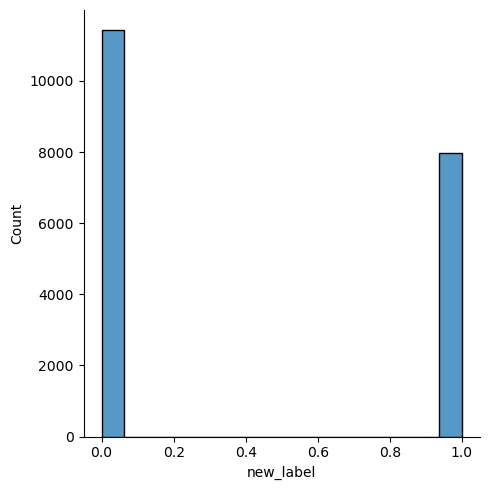

In [44]:
# PLot hte distribution of assigned labels

sns.displot(
    data = data,
    x = "new_label",
)